In [2]:
# numerical module
import numpy as np

#setup plotting 
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
plt.style.use('./style/SciencePlots-APS.mplstyle')


## Plot bandstructure

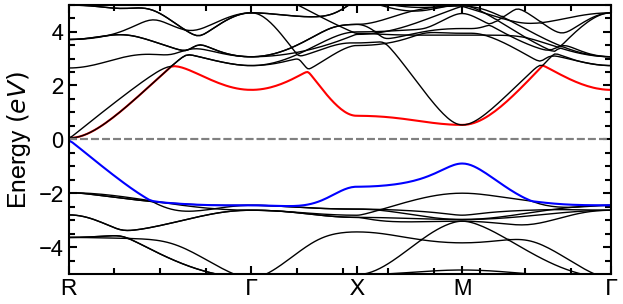

In [8]:
def read_band(file, E_F):
    dat = np.loadtxt(file)

    k_lst = np.unique(dat[:, 0])

    E_k = (np.reshape(dat[:, 1], (-1, len(k_lst))).T) - E_F
    
    return k_lst, E_k

k_lst, E_k = read_band('./data/CsSnI3.bands.gnu', 4.7016)

k_hs = np.array([0.0, 0.866, 1.3666, 1.866, 2.5731])
k_hs_label = np.array([r'R', r'$\Gamma$', r'X', r'M', r'$\Gamma$'])

fig,ax = plt.subplots(1, figsize = (7, 3.5))

for i in range(0, E_k.shape[1]): 
    color = 'black'
    lw = 1.0
    if i == 21 :
        color = 'b'
        lw = 1.5
    if i == 22 :
        color = 'r'
        lw = 1.5    
    ax.plot(k_lst, E_k[:, i], color = color, lw = lw)


ax.set_xlim(k_hs[0], k_hs[-1])
ax.set_xticks(k_hs)
ax.set_xticklabels(k_hs_label)
ax.axhline(0, color = 'gray', ls = '--', lw = 1.5)


ax.set_ylim(-5.0, 5.0)
ax.set_ylabel(r'Energy $\left(eV\right)$')
ax.axhline(0, color = 'gray', ls = '--', lw = 1.5)

fig.savefig('./bandstructure_CsSnI3.png', dpi = 600)
plt.show()

## Plot density-of-states (DOS)

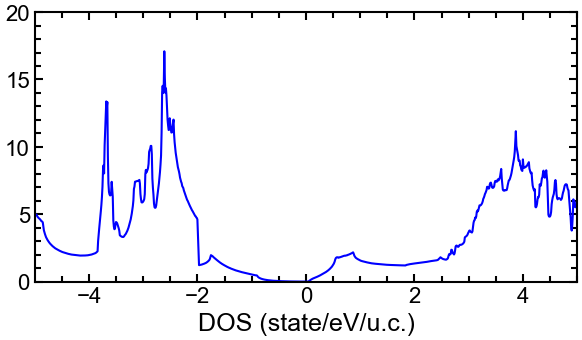

In [9]:
def read_DOS(file, E_F):
    E, DOS, iDOS = np.loadtxt(file, unpack = True)

    E -= E_F
    return E, DOS

E, DOS = read_DOS('./data/CsSnI3.dos', 4.7016)

fig, ax = plt.subplots(1, figsize = (7, 3.5))

ax.plot(E, DOS, 'b-', lw = 1.5)

ax.set_xlabel('DOS (state/eV/u.c.)')
ax.set_xlim(-5.0, 5.0)
ax.set_ylim(0,20)


fig.savefig('./DOS_CsSnI3.png', dpi = 600)

plt.show()

## Plot bandstructure alongside with DOS

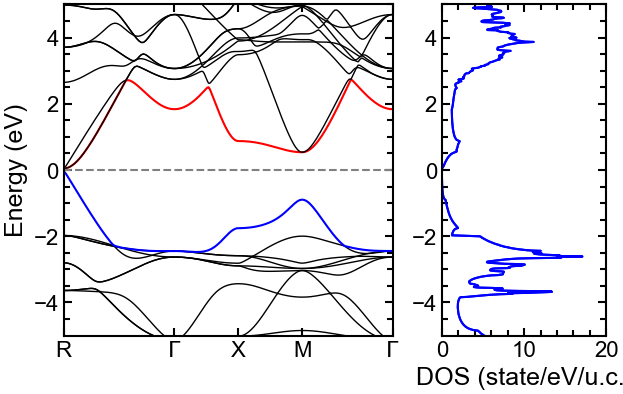

In [17]:
fig, ax = plt.subplots(1, 2, gridspec_kw = {'width_ratios' : [6, 3]})

for i in range(0, E_k.shape[1]):
    color = 'black'
    lw = 1.0
    if i == 21 :
        color = 'b'
        lw = 1.5
    if i == 22 :
        color = 'r'
        lw = 1.5
    ax[0].plot(k_lst, E_k[:, i], color = color, lw = lw )

ax[1].plot(DOS, E, 'b-', lw = 1.5)

ax[0].set_xlim(k_hs[0], k_hs[-1])
ax[0].set_xticks(k_hs)
ax[0].set_xticklabels(k_hs_label)
ax[0].tick_params(axis = 'x', which = 'minor', bottom = False, top = False)
ax[0].set_ylabel('Energy (eV)')
ax[0].set_ylim(-5.0, 5.0)
ax[0].axhline(0, color = 'gray', ls = '--', lw = 1.5)

ax[1].plot(DOS, E, 'b-', lw=1.5)
# X-axis
ax[1].set_xlabel('DOS (state/eV/u.c.)')
ax[1].set_xlim(0, 20)
# Y-axis
ax[1].set_ylim(-5.0, 5.0)

fig.savefig('./bandstructure+DOS_CsSnI3.png', dpi = 600)
plt.show()

## Plot partial density-of-states

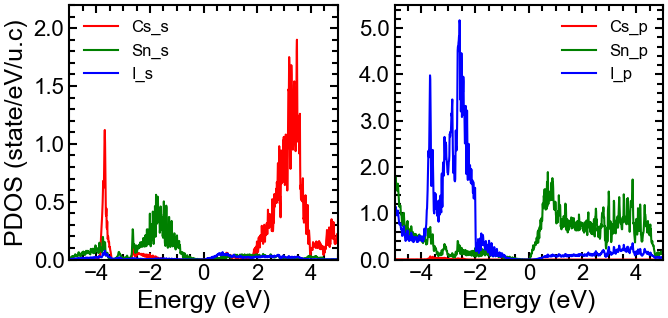

In [26]:
def read_PDOS(file, E_F):
    E, PDOS = np.loadtxt(file, usecols=(0,1), unpack = True)
    E -= E_F
    
    return E, PDOS 

E_Cs_s, PDOS_Cs_s = read_PDOS('./data/CsSnI3.pdos_atm#1(Cs)_wfc#2(s)', E_F = 4.7016) 

E_Sn_s, PDOS_Sn_s = read_PDOS('./data/CsSnI3.pdos_atm#2(Sn)_wfc#1(s)', E_F = 4.7016)

E_I_s, PDOS_I_s = read_PDOS('./data/CsSnI3.pdos_atm#4(I)_wfc#1(s)', E_F = 4.7016)

E_Cs_p, PDOS_Cs_p = read_PDOS('./data/CsSnI3.pdos_atm#1(Cs)_wfc#3(p)', E_F = 4.7016)

E_Sn_p, PDOS_Sn_p = read_PDOS('./data/CsSnI3.pdos_atm#2(Sn)_wfc#2(p)', E_F = 4.7016)

E_I_p, PDOS_I_p = read_PDOS('./data/CsSnI3.pdos_atm#3(I)_wfc#2(p)', E_F = 4.7016)

fig, ax = plt.subplots (1, 2, figsize = (7, 3.5))

color = ['r-', 'g-', 'b-', 'r-', 'g-', 'b-']
label = ['Cs_s', 'Sn_s', 'I_s','Cs_p', 'Sn_p', 'I_p' ]

ax[0].plot(E_Cs_s, PDOS_Cs_s, 'r-', lw=1.5, label='Cs_s')
ax[0].plot(E_Sn_s, PDOS_Sn_s, 'g-', lw=1.5, label='Sn_s')
ax[0].plot(E_I_s, PDOS_I_s, 'b-', lw=1.5, label='I_s')

ax[0].set_xlabel('Energy (eV)')
ax[0].set_xlim(-5.0, 5.0)
ax[0].set_xticks([-4.0, -2.0, 0., 2., 4.])

ax[0].set_ylabel('PDOS (state/eV/u.c)')
ax[0].set_ylim(0., 2.2)
ax[0].set_yticks([0.0, 0.5, 1.0, 1.5, 2.0])
ax[0].legend(loc='best', prop={'size': 12})

ax[1].plot(E_Cs_p, PDOS_Cs_p, 'r-', lw=1.5, label='Cs_p')
ax[1].plot(E_Sn_p, PDOS_Sn_p, 'g-', lw=1.5, label='Sn_p')
ax[1].plot(E_I_p, PDOS_I_p, 'b-', lw=1.5, label='I_p')

ax[1].set_xlabel('Energy (eV)')
ax[1].set_xlim(-5.0, 5.0)
ax[1].set_xticks([-4.0, -2.0, 0., 2., 4.])

ax[1].set_ylim(0., 5.5)
ax[1].set_yticks([0.0, 1.0, 2.0, 3.0, 4.0, 5.0])
ax[1].set_yticklabels(['0.0', '1.0', '2.0', '3.0', '4.0', '5.0'])
ax[1].legend(loc='best', prop={'size': 12})

plt.tight_layout()

fig.savefig('./PDOS_CsSnI3.png', dpi = 600)
plt.show()

## Raman peak analysis

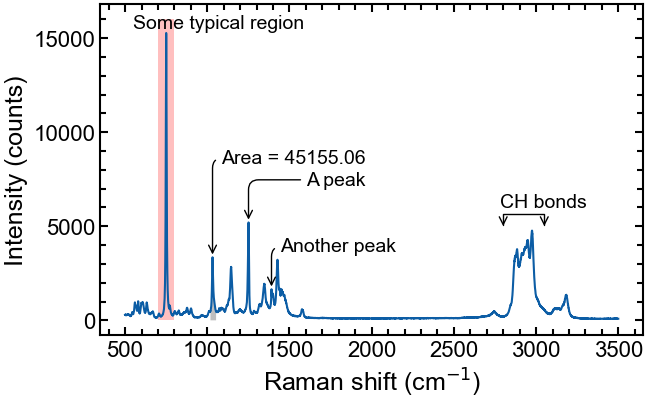

In [27]:


import numpy as np
import matplotlib.pyplot as plt

# Load data (fill it with read raman data in the folder /data/ with unpack=True)
w, i = np.loadtxt("./data/raman.txt", unpack = True)

# Plot data
plt.plot(w, i)
plt.xlabel('Raman shift (cm$^{-1}$)')
plt.ylabel('Intensity (counts)')

# Create a new figure and axes instance
ax = plt.gca()

# Shade and annotate a red rectangle over a typical region
ax.annotate('Some typical region', xy=(550, 15500), xycoords='data')
ax.fill_between([700, 800], 0, [16000, 16000], facecolor='red', alpha=0.25)

# Shade a specific region in the spectrum and annotate its area
ind = (w > 1019) & (w < 1054)
ax.fill_between(w[ind], 0, i[ind], facecolor='gray', alpha=0.5)
area = np.trapz(i[ind], w[ind])
x, y = w[ind][np.argmax(i[ind])], i[ind][np.argmax(i[ind])]
ax.annotate(f'Area = {area:.2f}', xy=(x, y),
            xycoords='data',
            xytext=(x + 50, y + 5000),
            textcoords='data',
            arrowprops=dict(arrowstyle="->", 
                            connectionstyle="angle,angleA=0,angleB=90,rad=10"))

# Annotate a peak in the 1250-1252 range
ind = (w > 1250) & (w < 1252)
x, y = w[ind][np.argmax(i[ind])], i[ind][np.argmax(i[ind])]
ax.annotate('A peak', xy=(x, y),
            xycoords='data',
            xytext=(x + 350, y + 2000),
            textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle,angleA=0,angleB=90,rad=10"))

# Annotate another peak in the 1380-1400 range
ind = (w > 1380) & (w < 1400)
x, y = w[ind][np.argmax(i[ind])], i[ind][np.argmax(i[ind])]
ax.annotate('Another peak', xy=(x, y),
            xycoords='data',
            xytext=(x + 50, y + 2000),
            textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle,angleA=0,angleB=90,rad=10"))

# Indicate a region with connected arrows
ax.annotate('CH bonds', xy=(2780, 6000), xycoords='data')
ax.annotate('', xy=(2800., 5000.), xycoords='data',
            xytext=(3050, 5000), textcoords='data',
            arrowprops=dict(arrowstyle="<->",
                            connectionstyle="bar",
                            ec="k",
                            shrinkA=0.1, shrinkB=0.1))

#plt.savefig('images/plot-annotes.png')
plt.show()
